In [1]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [2]:
#Bibliotecas
import PIL
import cv2
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#### Recuperando as imagens

In [3]:
#Carregando as imanges
image = cv2.imread('../datasets/ocr/sample_mgh.jpg')
im_h, im_w, im_d = image.shape
base_image = image.copy()

In [4]:
#Pré-processamento das imagens
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

                                                    #selecionando as features mais longas e finas
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,10))
dilate = cv2.dilate(thresh, kernel, iterations=1)

#### Detectando a linha vertical antes do footnote
Encontrando os contornos e desenhando o retangulo

In [5]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[1])
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h < 20 and w > 250:
        roi = base_image[0:y+h, 0:x+im_w]
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        
cv2.imwrite("data-processed/output.png", roi)

True

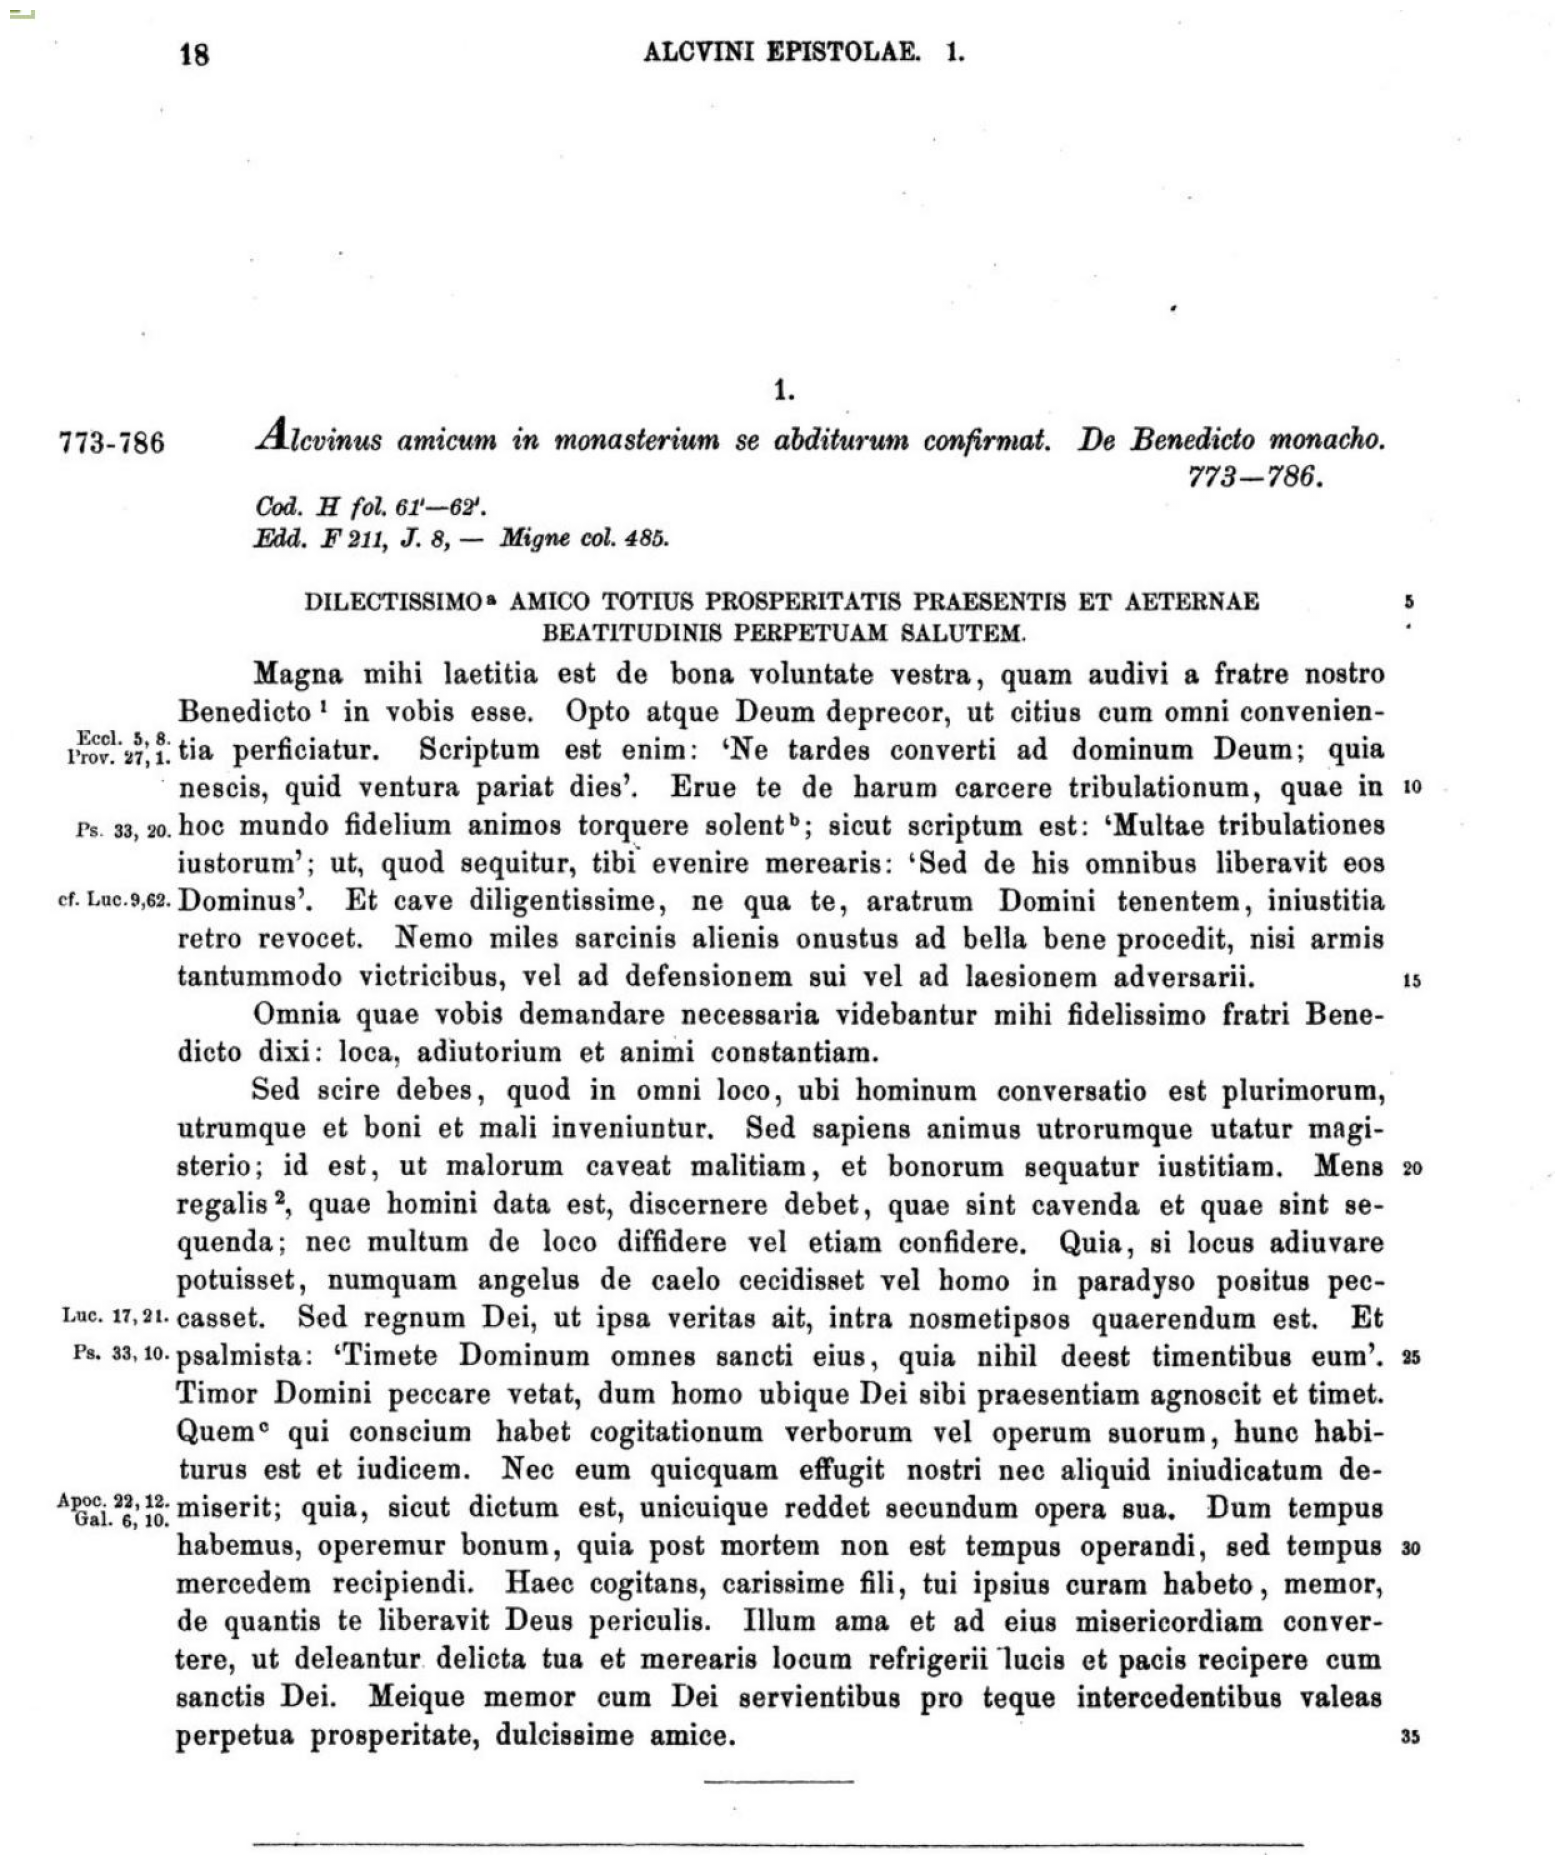

In [6]:
display('data-processed/output.png')